In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/avito-category-prediction/sample_submission.csv
/kaggle/input/avito-category-prediction/train.csv
/kaggle/input/avito-category-prediction/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/avito-category-prediction/train.csv')
test = pd.read_csv('/kaggle/input/avito-category-prediction/test.csv')

In [3]:
train.head()

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


**ЗАДАНИЕ 1**

In [4]:
np.sum(train.isna())

title            0
description      2
Category_name    0
Category         0
dtype: int64

In [5]:
np.sum(test.isna())

title          0
description    1
itemid         0
dtype: int64

и в train и в test есть пропуски, заполню пустой строкой

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
train.loc[train.description.isna(), "description"] = ""
test.loc[test.description.isna(), "description"] = ""

In [8]:
np.sum(train.isna())

title            0
description      0
Category_name    0
Category         0
dtype: int64

In [9]:
np.sum(test.isna())

title          0
description    0
itemid         0
dtype: int64

**ЗАДАНИЕ 2**

In [10]:
train["info"] = train["title"] + " " + train["description"]
test["info"] = test["title"] + " " + test["description"]
#train["info"] = train[train.columns[0:1]].apply(lambda x: ' '.join(x.astype(str)), axis=1)
#test["info"] = train[test.columns[0:1]].apply(lambda x: ' '.join(x.astype(str)), axis=1)

In [11]:
train = train.drop(["title", "description"], axis=1)
test = test.drop(["title", "description"], axis=1)

In [12]:
train.head()

,Category_name,Category,info
0,Запчасти и аксессуары,10,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 ..."
1,Бытовая техника,21,Утюг утп 1000 ватт СССР 1987 год Продам/\n Фот...
2,Предложение услуг,114,Возвму машину с выкупом Возьму машину в аренду...
3,"Одежда, обувь, аксессуары",27,"Полусапожки полусапожки в отличном состоянии, ..."
4,"Одежда, обувь, аксессуары",27,Босоножки кожаные Кожаные(натур) босоножки Kar...


In [13]:
test.head()

,itemid,info
0,1778449823,Мастерка Мастерка фирмы форвард. Белого цвета....
1,1677656962,"Зимние сапоги Продаю зимние сапоги, в хорошем ..."
2,1758182804,Видеонаблюдение 8 камер В комплект Atis AMD-2M...
3,1689811299,Запчасти для GLE Запчасти GLE
4,1804706240,Бластер nerf Состояние 5+/\nПродаю потому что ...


**ЗАДАНИЕ 3**

In [14]:
len(train["Category"].unique())

50

значит всего 50 уникальцых классов

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


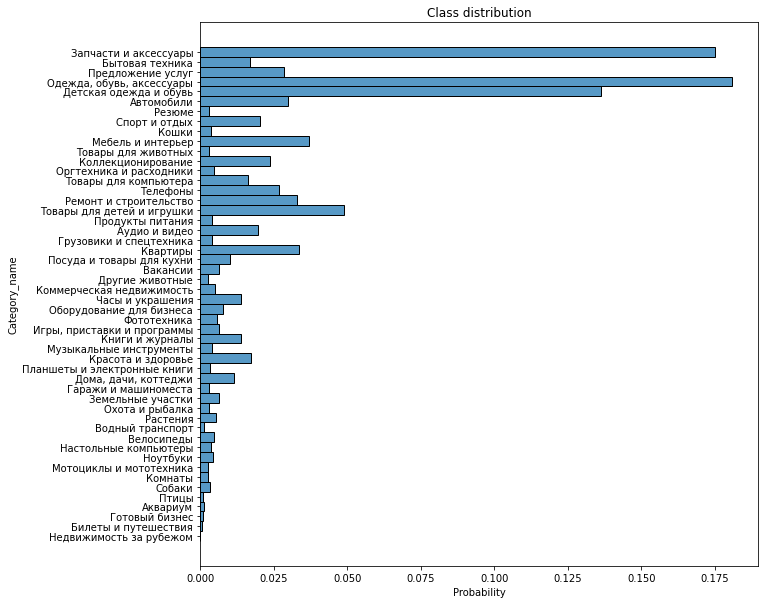

In [16]:
plt.figure(figsize=(10,10))
sns.histplot(data=train, y="Category_name", stat="probability")
plt.title("Class distribution")
plt.show()

В датасете сильно преобладают три класса "Запчасти и аксессуары",
"Одежда, обувь, аксессуары" и "Детская одежда и обувь", их доли составляют примерно 0.8, 0.75 и 0.137
соответственно.
Самые маленькие доли составляют "Недвижимость за рубежом", "Птицы" и "Готовый бизнес".
(Доли этих классов настолько малы, что из графика сложно понять, какую именно долю они составляют)

**ЗАДАНИЕ 4**

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer()
X = cnt_vec.fit_transform(train["info"])

In [18]:
X

<4234042x2125805 sparse matrix of type '<class 'numpy.int64'>'
	with 150918485 stored elements in Compressed Sparse Row format>

После применения CountVectorizer получается матрица размера 4234042 на 469015

**ЗАДАНИЕ 5**

In [19]:
import re

In [20]:
scheme = re.compile("[0-9]+[А-Яа-яёA-Za-z]*")
tmp = scheme.findall(str(cnt_vec.vocabulary_.keys()))
print(len(tmp))

1225139


То есть всего 1225139 слов, которые начинаются с цифр

In [21]:
#import string
scheme_2 = re.compile("[^A-Za-zА-Яа-яё0-9_]") # \W+
tmp_2 = scheme_2.findall(str(cnt_vec.vocabulary_.keys()))
print(len(tmp_2))

8510461


То есть всего 1225139 слов, которые начинаются с цифр

In [22]:
print(len(tmp_2[0]))

1


**ЗАДАНИЕ 6**

In [23]:
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [24]:
def my_tokenizer(string: str) -> list:
    # 0)
    string = string.lower()
    # 1)
    list = word_tokenize(string)
    # 2)
    list = [token for token in list
            if not np.sum([(char in punctuation + "0123456789") for char in token])]
    # 3)
    sw = stopwords.words('russian')
    list = [token for token in list if not(token in sw)]
    # 4)
    stemmer = SnowballStemmer("russian")
    list = [stemmer.stem(token) for token in list]
    return list

Демонстрация работы функции:

In [25]:
my_tokenizer(train["info"][0])

['эб',
 'renault',
 'nissa',
 'dci',
 'delph',
 'год',
 'комплект',
 'эб',
 'мозг',
 'компьютер',
 'мотор',
 'двигател',
 'коммутатор',
 'электрон',
 'блок',
 'управлен',
 'двигател',
 'компьютер',
 'мотор',
 'рен',
 'kango',
 'канг',
 'канг',
 'мега',
 'сценик',
 'lagun',
 'лагун',
 'cli',
 'кли',
 'nissa',
 'micr',
 'нисса',
 'микр',
 'друг',
 'рен',
 'нисса',
 'дизел',
 'топливн',
 'аппаратур',
 'делф',
 'оригина',
 'отличн',
 'состоян',
 'проверен',
 'гарант',
 'запчаст',
 'предоставля',
 'гарант',
 'возможн',
 'установк',
 'подробн',
 '—',
 'раздел',
 '«',
 'компан',
 '»',
 'дорож',
 'сво',
 'репутац',
 'торгу',
 'легальн',
 'контрактн',
 'запчаст',
 'дета',
 'налич',
 'таможен',
 'документ',
 'запчаст',
 'автомобил',
 'пробег',
 'росс',
 'отправля',
 'друг',
 'регион',
 'таможен',
 'союз',
 'транспортн',
 'компан',
 'наложн',
 'платеж']

**ЗАДАНИЕ 7**

In [26]:
np.random.seed(12345)
batch_train = train.sample(100000)
batch_train.head()

,Category_name,Category,info
231113,Растения,106,Пеларгония герань Продаётся укоренённые черенк...
956282,"Одежда, обувь, аксессуары",27,Чемодан на колёсах Roxy Чемодан на колёсах rox...
2692691,Предложение услуг,114,Грузоперевозки Грузоперевозки и переезды по Ро...
1800877,Детская одежда и обувь,29,Конверт-кокон В отличном состоянии. Прекрасно ...
561754,Телефоны,84,Коробка iPhone 3G Хор. состояние


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report

In [28]:
np.random.seed(12345)
X_train, X_test, y_train, y_test = train_test_split(batch_train["info"],
                                                    batch_train["Category"],
                                                    test_size=0.2)

In [29]:
my_vec = CountVectorizer(tokenizer=my_tokenizer)
bow = my_vec.fit_transform(X_train)
bow_test = my_vec.transform(X_test)

In [30]:
scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)

In [31]:
sgd = SGDClassifier(loss='modified_huber')
sgd.fit(bow, y_train)
sgd_y_pred_train = sgd.predict(bow)
sgd_y_pred = sgd.predict(bow_test)

In [32]:
print("Train: ", np.mean(sgd_y_pred_train==y_train))
print("Test: ", np.mean(sgd_y_pred==y_test))

Train:  0.9244
Test:  0.80985


In [33]:
print(classification_report(y_test, sgd_y_pred))

              precision    recall  f1-score   support

           9       0.88      0.88      0.88       585
          10       0.86      0.96      0.91      3579
          11       0.58      0.37      0.45        19
          14       0.90      0.34      0.49        56
          19       0.73      0.64      0.68       613
          20       0.75      0.71      0.73       743
          21       0.75      0.68      0.71       357
          23       1.00      0.87      0.93        62
          24       0.99      0.99      0.99       666
          25       1.00      0.98      0.99       236
          26       1.00      0.99      1.00       120
          27       0.74      0.90      0.81      3600
          28       0.88      0.78      0.83       289
          29       0.82      0.83      0.82      2730
          30       0.76      0.76      0.76       998
          31       0.82      0.59      0.69        63
          32       0.80      0.72      0.76       396
          33       0.67    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**ЗАДАНИЕ 8**

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
tfidf_vec = TfidfVectorizer(tokenizer=my_tokenizer)
tfidf = tfidf_vec.fit_transform(X_train)
tfidf_test = tfidf_vec.transform(X_test)

In [36]:
scaler_tfidf = MaxAbsScaler()
tfidf = scaler_tfidf.fit_transform(tfidf)
tfidf_test = scaler_tfidf.transform(tfidf_test)

In [37]:
sgd_tfidf = SGDClassifier(loss='modified_huber')
sgd_tfidf.fit(tfidf, y_train)
sgd_tfidf_y_pred_train = sgd_tfidf.predict(tfidf)
sgd_tfidf_y_pred = sgd_tfidf.predict(tfidf_test)

In [38]:
print("Train: ", np.mean(sgd_tfidf_y_pred_train==y_train))
print("Test: ", np.mean(sgd_tfidf_y_pred==y_test))

Train:  0.9559
Test:  0.85605


In [39]:
print(classification_report(y_test, sgd_tfidf_y_pred))

              precision    recall  f1-score   support

           9       0.92      0.92      0.92       585
          10       0.92      0.96      0.94      3579
          11       0.75      0.63      0.69        19
          14       0.93      0.48      0.64        56
          19       0.72      0.79      0.76       613
          20       0.79      0.80      0.80       743
          21       0.83      0.80      0.82       357
          23       1.00      0.94      0.97        62
          24       0.99      0.99      0.99       666
          25       1.00      0.97      0.99       236
          26       0.99      0.99      0.99       120
          27       0.84      0.90      0.87      3600
          28       0.90      0.87      0.88       289
          29       0.85      0.85      0.85      2730
          30       0.79      0.82      0.81       998
          31       0.76      0.59      0.66        63
          32       0.80      0.84      0.82       396
          33       0.55    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
tfidf_vec_2 = TfidfVectorizer(tokenizer=my_tokenizer, max_df=0.9)
tfidf_2 = tfidf_vec_2.fit_transform(X_train)
tfidf_test_2 = tfidf_vec_2.transform(X_test)

In [41]:
scaler_tfidf_2 = MaxAbsScaler()
tfidf_2 = scaler_tfidf_2.fit_transform(tfidf_2)
tfidf_test_2 = scaler_tfidf_2.transform(tfidf_test_2)

In [42]:
sgd_tfidf_2 = SGDClassifier(loss='modified_huber')
sgd_tfidf_2.fit(tfidf_2, y_train)
sgd_tfidf_y_pred_train_2 = sgd_tfidf_2.predict(tfidf_2)
sgd_tfidf_y_pred_2 = sgd_tfidf_2.predict(tfidf_test_2)

In [43]:
print("Train: ", np.mean(sgd_tfidf_y_pred_train_2==y_train))
print("Test: ", np.mean(sgd_tfidf_y_pred_2==y_test))

Train:  0.956125
Test:  0.8559


In [44]:
print(classification_report(y_test, sgd_tfidf_y_pred_2))

              precision    recall  f1-score   support

           9       0.92      0.92      0.92       585
          10       0.92      0.96      0.94      3579
          11       0.75      0.63      0.69        19
          14       0.90      0.50      0.64        56
          19       0.72      0.79      0.75       613
          20       0.79      0.80      0.80       743
          21       0.82      0.79      0.80       357
          23       1.00      0.94      0.97        62
          24       0.99      1.00      1.00       666
          25       1.00      0.97      0.99       236
          26       0.99      0.99      0.99       120
          27       0.84      0.90      0.87      3600
          28       0.89      0.87      0.88       289
          29       0.85      0.86      0.85      2730
          30       0.79      0.83      0.81       998
          31       0.76      0.62      0.68        63
          32       0.80      0.83      0.82       396
          33       0.44    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Как видно, при добавлении параметра max_df=0.9 качество не изменилось (совсем немного на train поменялось, но это незначительно, так как на тесте осталось таким же).
Посмотрю на размер матриц

In [45]:
tfidf

<80000x79883 sparse matrix of type '<class 'numpy.float64'>'
	with 1989045 stored elements in Compressed Sparse Row format>

In [46]:
tfidf_2

<80000x79883 sparse matrix of type '<class 'numpy.float64'>'
	with 1989045 stored elements in Compressed Sparse Row format>

Также парамерт max_df=0.9 не повлиял и на размер разреженной матрицы

**ЗАДАНИЕ 9**

In [47]:
from sklearn.feature_extraction.text import HashingVectorizer

In [48]:
hash_vect = HashingVectorizer(tokenizer=my_tokenizer, n_features=30000)
my_hash = hash_vect.fit_transform(X_train)
my_hash_test = hash_vect.transform(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [49]:
scaler_hash = MaxAbsScaler()
my_hash = scaler_hash.fit_transform(my_hash)
my_hash_test = scaler_hash.transform(my_hash_test)

In [50]:
sgd_hash = SGDClassifier(loss='modified_huber')
sgd_hash.fit(my_hash, y_train)
sgd_hash_y_pred_train = sgd_hash.predict(my_hash)
sgd_hash_y_pred = sgd_hash.predict(my_hash_test)

In [51]:
print("Train: ", np.mean(sgd_hash_y_pred_train==y_train))
print("Test: ", np.mean(sgd_hash_y_pred==y_test))

Train:  0.9411125
Test:  0.8411


In [52]:
print(classification_report(y_test, sgd_hash_y_pred))

              precision    recall  f1-score   support

           9       0.93      0.93      0.93       585
          10       0.91      0.96      0.93      3579
          11       0.73      0.58      0.65        19
          14       0.96      0.48      0.64        56
          19       0.68      0.74      0.71       613
          20       0.78      0.80      0.79       743
          21       0.79      0.77      0.78       357
          23       1.00      0.94      0.97        62
          24       0.99      1.00      0.99       666
          25       1.00      0.97      0.99       236
          26       0.99      0.99      0.99       120
          27       0.81      0.90      0.86      3600
          28       0.89      0.83      0.86       289
          29       0.85      0.83      0.84      2730
          30       0.77      0.80      0.78       998
          31       0.86      0.59      0.70        63
          32       0.79      0.80      0.79       396
          33       0.50    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Самое хорошее качество получилось с использованием TfidfVectorizer, при чём max_df=0.9 не повлиял на качество.